# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 1. Importing data and necessary libraries

In [32]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#import data
data=pd.read_csv('product_sales.csv')
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# 2. Data Validation 
Describing validation and cleaning steps for each column

In [34]:
# Validating data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [35]:
# Check how many total rows and columns
data.shape

(15000, 8)

In [36]:
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


### checking missing value

In [37]:
# Check columns for any missing values
data.isnull().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue               True
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

now from above,there is missing value in the revenue column, the rest columns do not have missing values

In [38]:
total_value=len(data['revenue'])
missing_value=(data['revenue'].isna().sum())

missing_prop=( missing_value/total_value)*100
print('The missing value of revenue is ',missing_value,',it takes ',missing_prop,'% to the total value' )

The missing value of revenue is  1074 ,it takes  7.16 % to the total value


In [39]:
mean_revenue=data['revenue'].mean()
data['revenue'].fillna(mean_revenue, inplace=True)

# Converting the 'week' column to string type
data['week'] = data['week'].astype(str)
data['week'].dtype

dtype('O')

### check if the values are unique or not

In [40]:
data.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6744
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [41]:
# Unique values in 'week' ,'sales_method','state' columns
print('Week unique values: ', data['week'].nunique())
print('Sales methods unique values: ', data['sales_method'].nunique())
print('States unique values: ',data['state'].nunique())
print('Number of sold items unique values: ', data['nb_sold'].nunique())
print()

data['week'].unique(),data['sales_method'].unique(),data['state'].unique()

Week unique values:  6
Sales methods unique values:  5
States unique values:  50
Number of sold items unique values:  10



(array(['2', '6', '5', '4', '3', '1'], dtype=object),
 array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
       dtype=object),
 array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
        'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
        'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
        'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
        'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
        'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
        'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
        'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
        'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
        'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
        'Wyoming'], dtype=object))

The 'sales_method' columns can be integrate

In [42]:
data['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

From above ,the'em+call' row and the 'Email+ Call' row should be in one row, 'email' and 'Email' should be one row

In [43]:
data['sales_method'] = data['sales_method'].replace('email', 'Email')
data['sales_method'] = data['sales_method'].replace('em + call', 'Email + Call')
data['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

### check duplicates

In [44]:
#check duplicates
data.duplicated().sum()

0

### Outliers


In [45]:
# Looking for abnormal values in 'years_as_customer' column
data['years_as_customer'].value_counts().sort_values(ascending=False).tail(10)

31    6
32    5
29    5
35    5
36    4
39    3
38    2
37    2
63    1
47    1
Name: years_as_customer, dtype: int64

The years_as_customer field shows a maximum value of 63. Given the company's founding year of 1984, the theoretical maximum for this field is 40 years. This discrepancy indicates likely data entry errors that require further investigation.

In [46]:
# Finding outliers
outliers = data[data['years_as_customer'] > 40]
outliers

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


Two records show a years_as_customer value that predates the company's 1984 founding. As these are clear data entry errors and their accuracy cannot be trusted, they have been removed from the dataset

In [47]:
# Removing outliers by filtering out customers with more than 40 years as a customer
sales_cleaned = data[data['years_as_customer'] <= 40]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  object 
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 937.6+ KB


# 3. Exploratory Analysis

## Q1. How many customers were there for each approach?

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


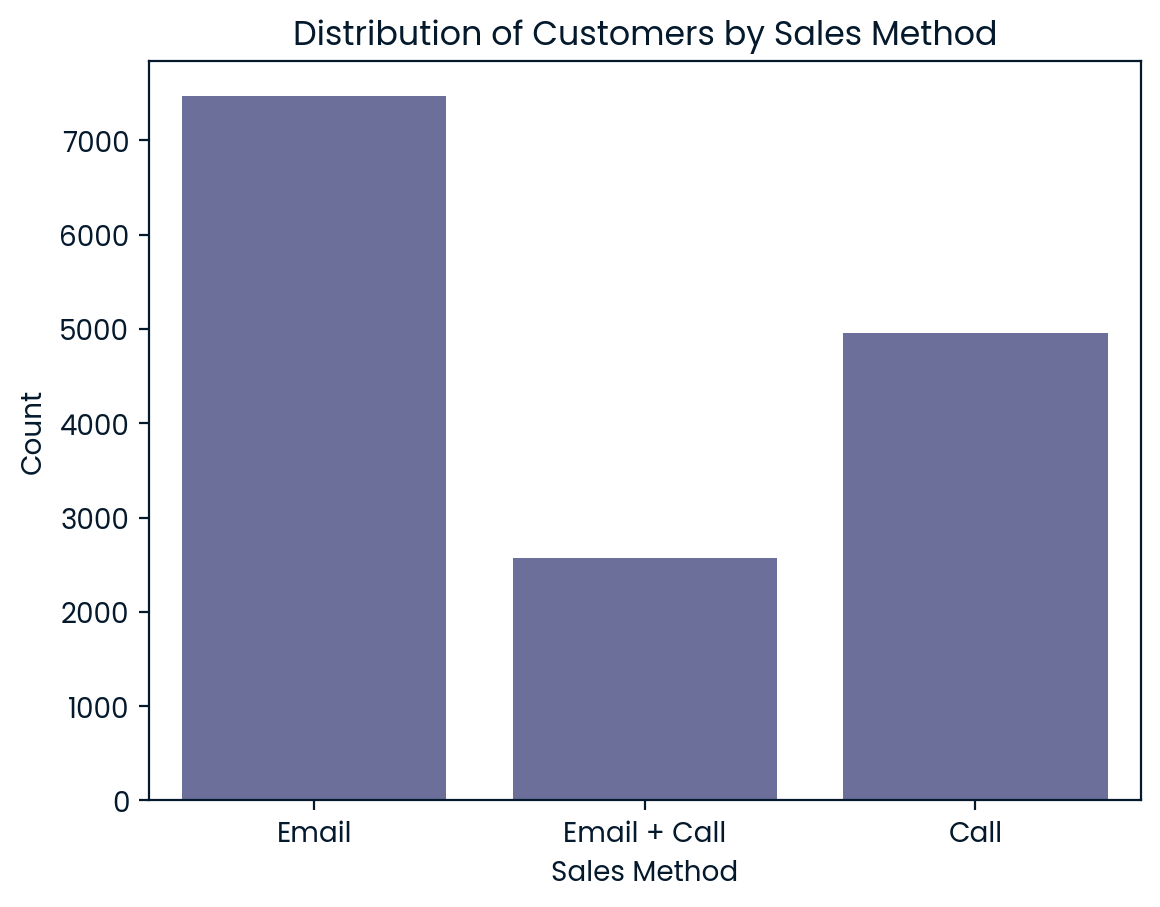

In [48]:
customer_counts=data['sales_method'].value_counts()
print(customer_counts)

sns.countplot(data=data, x='sales_method')
plt.title('Distribution of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.show()

The distribution of contact methods shows a clear preference for Email, which was used for 7,466 customers compared to all other methods. This suggests the sales team finds it the most efficient channel. Interestingly, the combined 'Email + Call' method (2,572 users) is used less frequently than 'Call' alone (4,962 users). This may indicate that the perceived additional effort of a multi-channel approach does not justify its use, or that the team lacks the incentives to employ more comprehensive contact strategies.

## Q2: What does the spread of the revenue look like overall? And for each method?

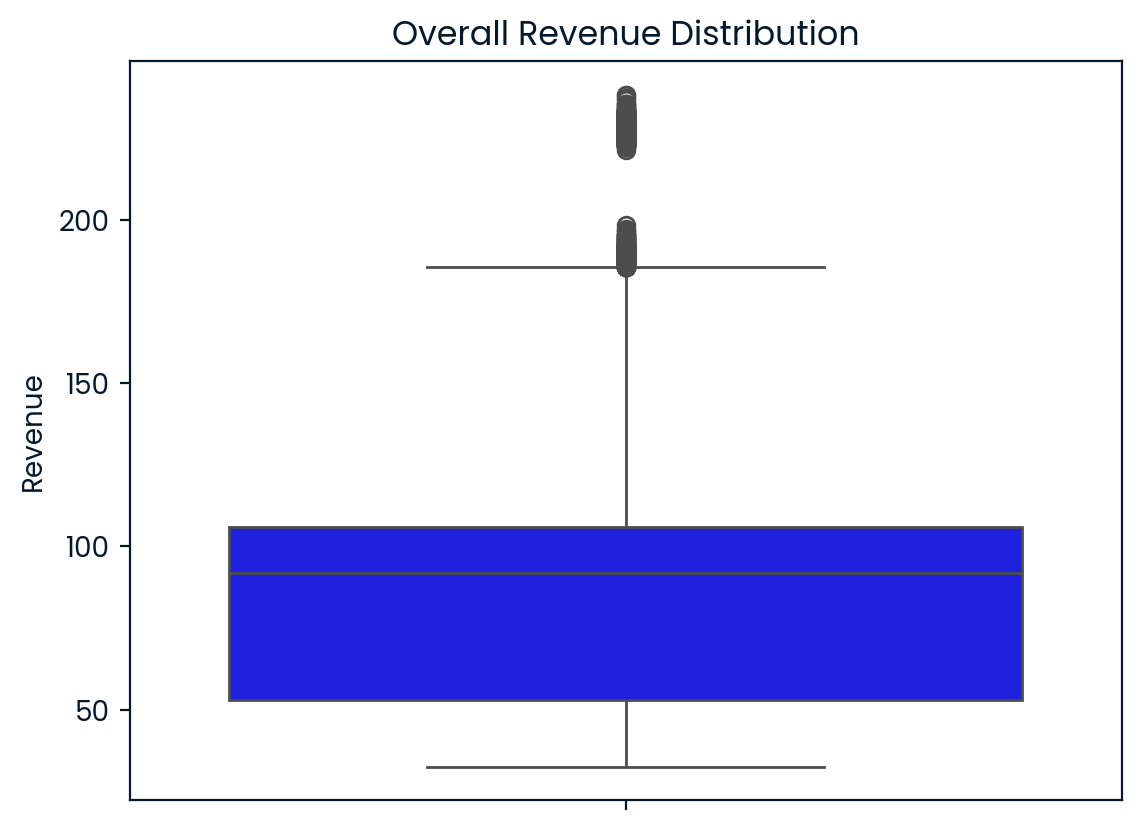

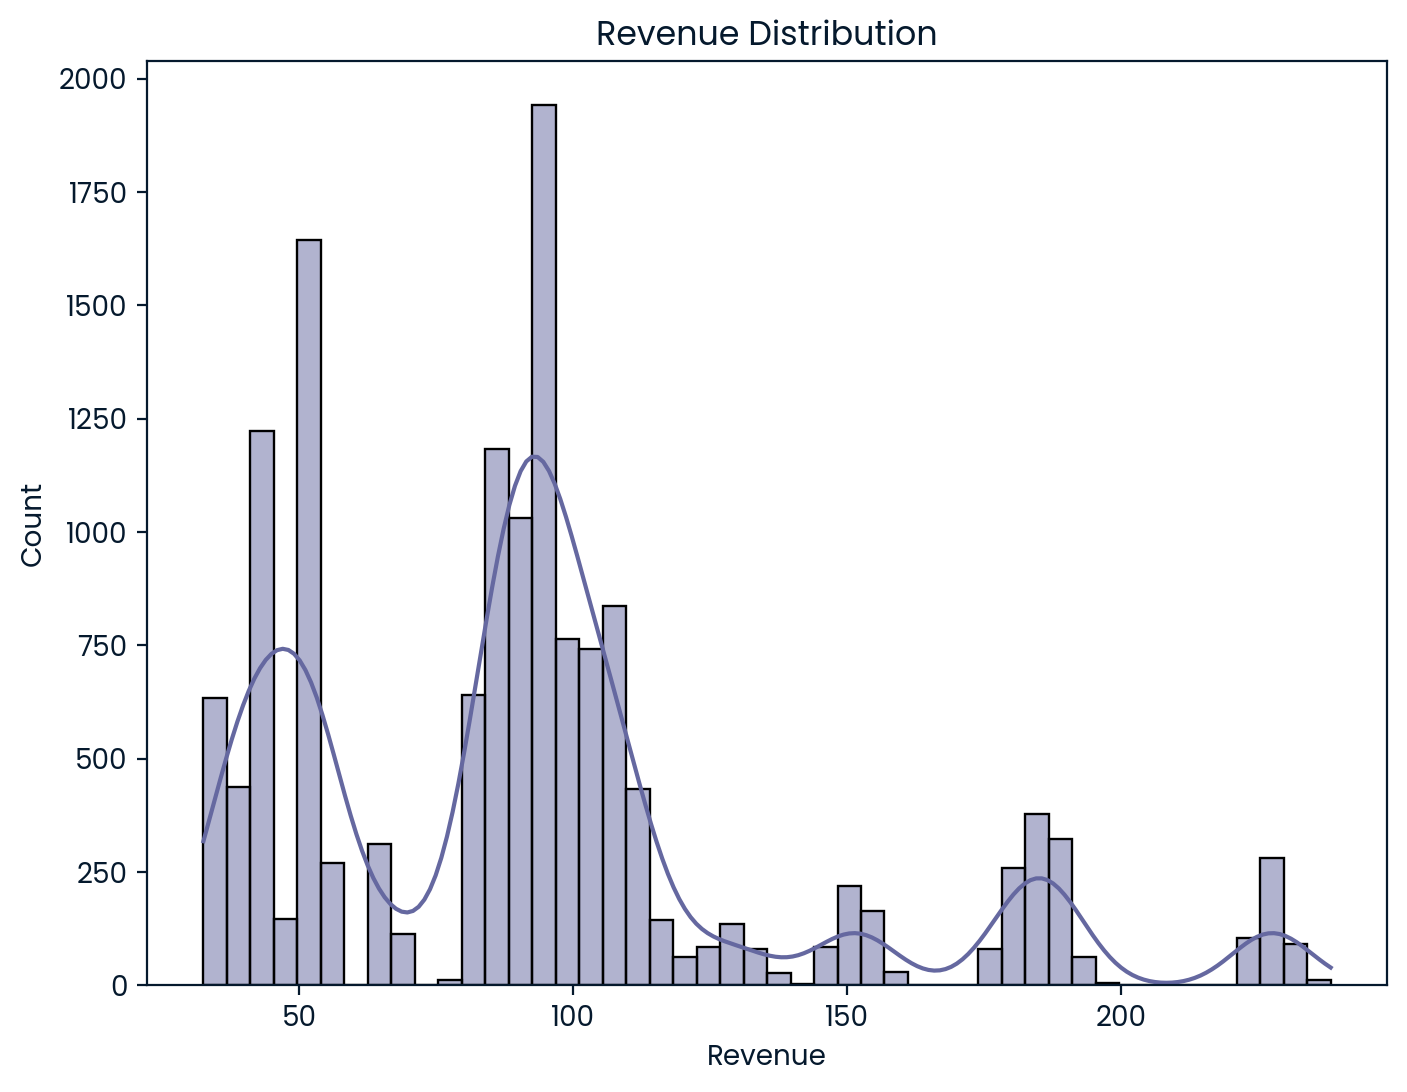

,index,revenue
0,count,15000.000000
1,mean,93.934943
2,std,45.705474
3,min,32.540000
4,25%,53.040000
5,50%,91.865000
6,75%,106.070000
7,max,238.320000


In [49]:
# Checking the distribution of revenue
sns.boxplot(y=data['revenue'], color='blue')
plt.title('Overall Revenue Distribution')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=data, x='revenue',kde=True)
plt.title("Revenue Distribution")
plt.xlabel('Revenue')
plt.show()

# Table containing the descriptive statistics of revenue
data['revenue'].describe().reset_index()

Revenue is right-skewed, with a mean of 95.56. This indicates that while most revenues are lower, a significant number of high-value outliers pull the average up.

Text(0, 0.5, 'Sales method')

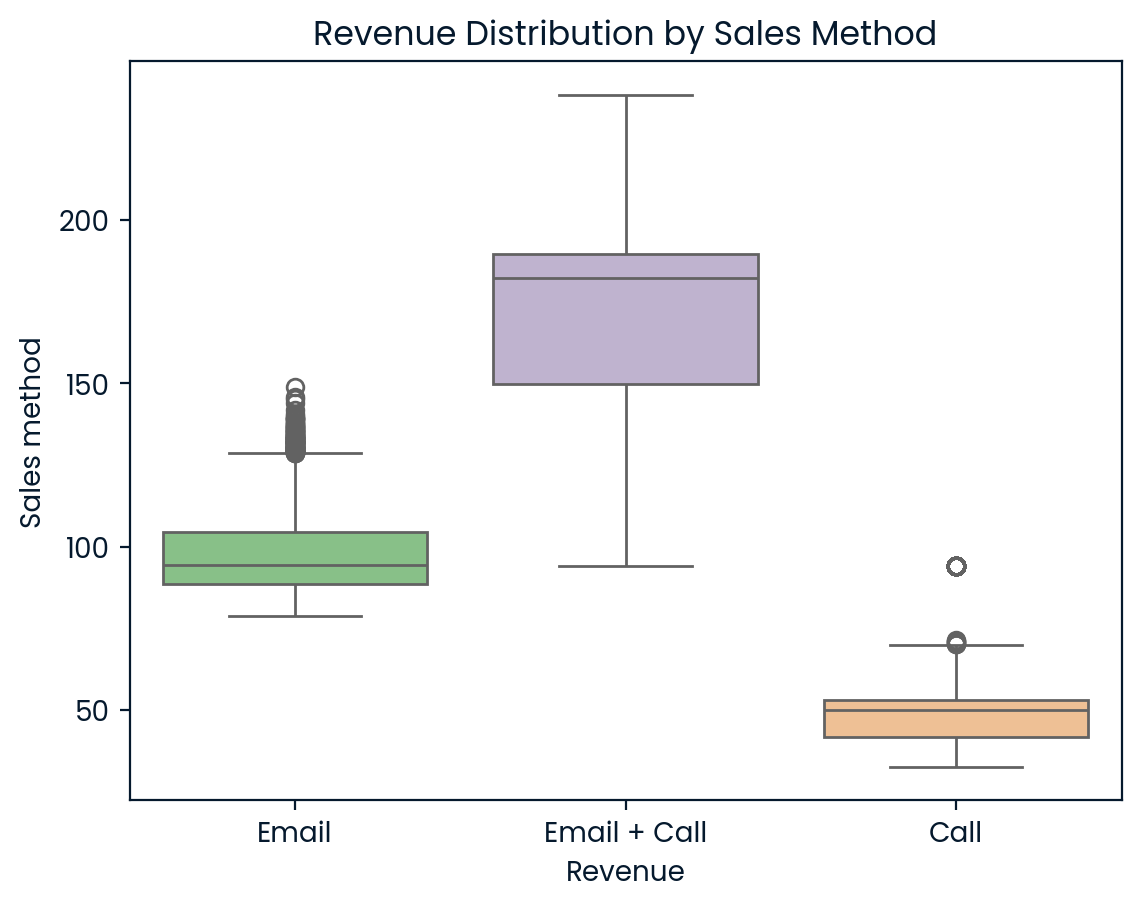

In [50]:
# Plot revenue distribution for each method
sns.boxplot(y=data['revenue'], x=data['sales_method'], palette='Accent')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Sales method')

**Email + Call**: Produces the widest revenue range and the highest-value outliers (200+), demonstrating its strength in securing large, exceptional transactions through combined efforts.

**Call**: Yields consistently moderate revenue (centered around 50), with its outliers suggesting that personalized negotiation can occasionally unlock significant value.

**Email**: Shows the most tightly clustered, lower-moderate revenue (under 100), with outliers likely tied to the success of specific marketing campaigns or offers.

In [51]:
# Calculating IQR for each sales method
iqr_df = data.groupby('sales_method')['revenue'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print('IQR for each sales method:')
print(iqr_df)

IQR for each sales method:
sales_method
Call            11.3475
Email           16.0700
Email + Call    39.7125
Name: revenue, dtype: float64


## Q3:Was there any difference in revenue over time for each of the methods?

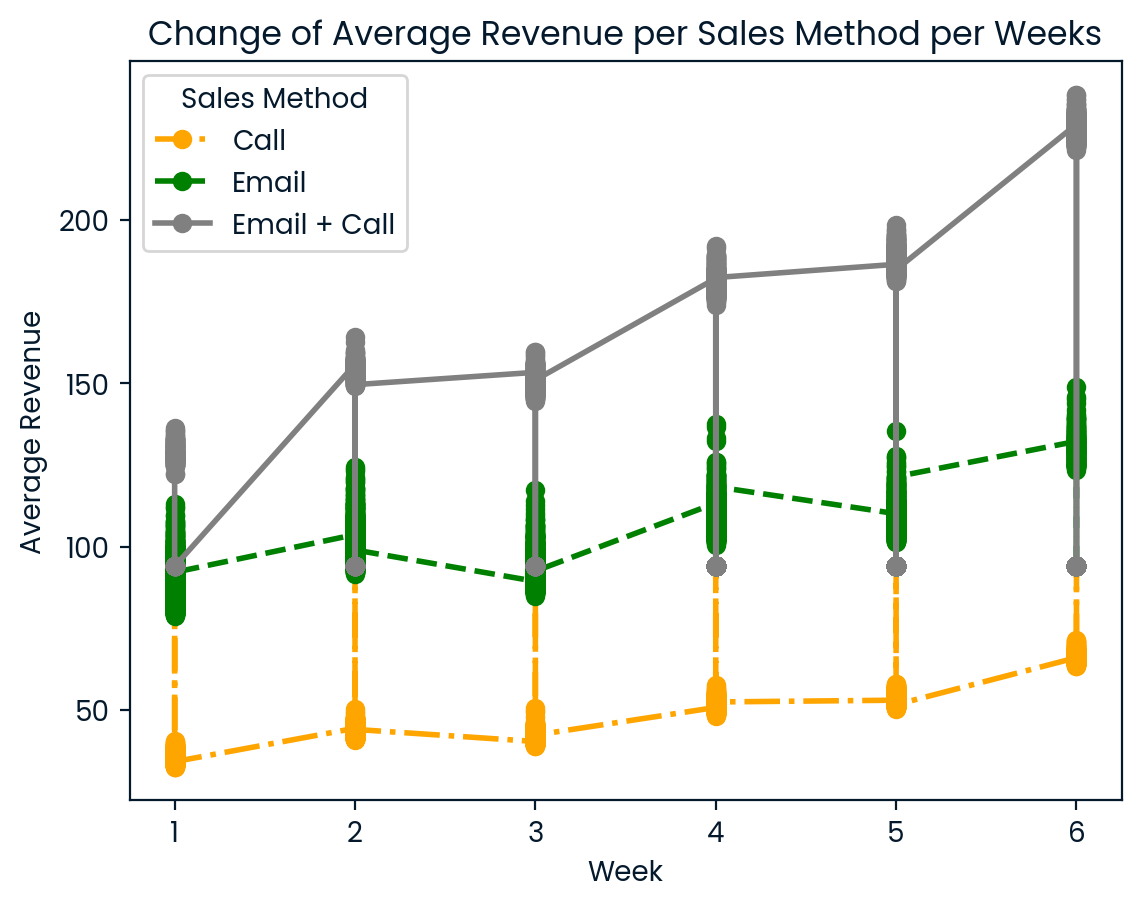

In [52]:
data_sorted = data.sort_values('week')
#plt.plot(data_sorted['week'], data_sorted['revenue'],color='green', linestyle='--', linewidth=2, marker='o')
style_map = {
    'Email': {'color': 'green', 'linestyle': '--'},
    'Call': {'color': 'orange', 'linestyle': '-.'},
    'Email and Call': {'color': 'blue', 'linestyle': '-'}
}

for method, group in data_sorted.groupby('sales_method'):
    style = style_map.get(method, {'color': 'gray', 'linestyle': '-'})
    plt.plot(
        group['week'],
        group['revenue'],
        color=style['color'],
        linestyle=style['linestyle'],
        linewidth=2,
        marker='o',
        label=method
    )
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.title("Change of Average Revenue per Sales Method per Weeks")
plt.legend(title='Sales Method')
plt.show()

The steeper slope of the 'Email + Call' trend line suggests it has a higher growth rate compared to the other methods. If this trend continues, we can project that the 'Email + Call' method will see the greatest increase in usage moving forward.

sales_method,Call,Email,Email + Call
week,,,
1,27850.01,247519.25,18482.22
2,36610.07,148130.48,29100.34
3,39441.06,106776.61,52024.86
4,53445.32,115772.84,84120.17
5,56993.70,80009.55,137236.50
6,30225.55,25209.71,120075.89


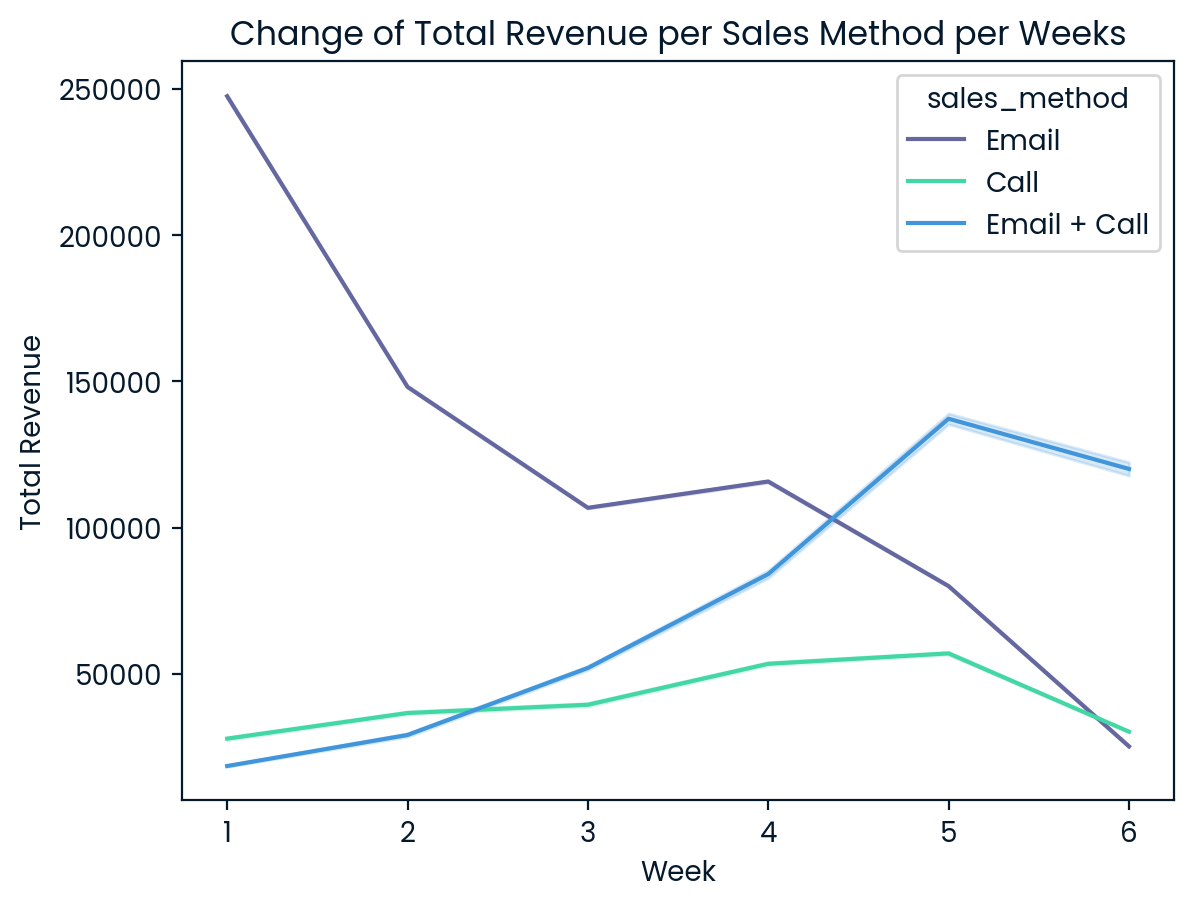

In [53]:
sns.lineplot(data=data_sorted, x='week' , y ='revenue', hue='sales_method', estimator='sum')
plt.title("Change of Total Revenue per Sales Method per Weeks")
plt.ylabel('Total Revenue')
plt.xlabel('Week')

difference = data.groupby(['week', 'sales_method'])['revenue'].agg(['sum']).reset_index().pivot(index='week', columns='sales_method', values='sum').round(2)
difference

The six-week performance data reveals distinct trajectories for each sales method. While the Email method generated the highest initial revenue , it subsequently experienced a consistent decline, suggesting potential market saturation or diminishing returns.

In contrast, both the Call and Email + Call methods demonstrated growth over the period. The Call method showed an overall upward trend, albeit with significant fluctuations and a recent dip. The Email + Call method, however, exhibited the most robust and healthy growth, with a steady increase in revenue throughout the six weeks.

## Q4: Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

In [54]:
# Calculate average revenue for each method
avg_revenue_by_method = data.groupby('sales_method')['revenue'].mean()

# Define contact hour assumptions
contact_hours = {
    'Email': 0.1,
    'Call': 0.5, 
    'Email + Call': 0.6
}

# Create the results table
results_data = []
for method in ['Email', 'Call', 'Email + Call']:
    avg_revenue = avg_revenue_by_method[method]
    contact_hr = contact_hours[method]
    revenue_per_hour = avg_revenue / contact_hr
    
    results_data.append({
        'Sales Method': method,
        'Avg. Revenue': f"${avg_revenue:.2f}",
        'Estimated Contact Hours': f"{contact_hr} hr",
        'Avg. Revenue per Contact Hour': f"${revenue_per_hour:.0f}"
    })

# Create DataFrame for nice formatting
results_df = pd.DataFrame(results_data)


print("INITIAL METRIC ESTIMATION")
print("="*85)
print(f"{'Sales Method':<15} {'Avg. Revenue':<15} {'Contact Hours':<15} {'Revenue per Hour':<20}")
print("-"*85)

for method in ['Email', 'Call', 'Email + Call']:
    avg_revenue = avg_revenue_by_method[method]
    contact_hr = contact_hours[method]
    revenue_per_hour = avg_revenue / contact_hr
    
    print(f"{method:<15} ${avg_revenue:<13.2f} {contact_hr:<14}hr ${revenue_per_hour:<18.0f}")

print("="*85)

INITIAL METRIC ESTIMATION
Sales Method    Avg. Revenue    Contact Hours   Revenue per Hour    
-------------------------------------------------------------------------------------
Email           $96.90         0.1           hr $969               
Call            $49.29         0.5           hr $99                
Email + Call    $171.48        0.6           hr $286               


In [55]:
table = {
    "Sales Method": ["Email", "Call", "Email + Call"],
    "Avg. Revenue": [96.90, 49.29, 171.48],
    "Contact Hours": [0.1, 0.5, 0.6],
    "Revenue/Hour": [969, 99, 286]
}

initial_metrics_df = pd.DataFrame(table)

# Optional: Format columns for cleaner report display
styled_initial_metrics = (
    initial_metrics_df.style
    .format({
        "Avg. Revenue": "${:.2f}",
        "Contact Hours": "{:.1f} hr",
        "Revenue/Hour": "${:,.0f}"
    })
    .hide(axis="index")  # hides the index column in report view
    .set_caption("Initial Revenue Estimation")
)

styled_initial_metrics

Sales Method,Avg. Revenue,Contact Hours,Revenue/Hour
Email,$96.90,0.1 hr,$969
Call,$49.29,0.5 hr,$99
Email + Call,$171.48,0.6 hr,$286


Based on the data, I recommend a balanced two-tier strategy rather than relying on a single method, because the results are not similar—they serve different strategic purposes.

The Strategic Recommendation
Use BOTH Email and Email + Call, but for different purposes:

1. Primary Workhorse: EMAIL
Use for: Broad prospecting, initial outreach, and lead qualification

Why: Highest efficiency at $969 per hour

When: First contact with new leads, newsletter campaigns, general outreach

2. Premium Conversion: EMAIL + CALL
Use for: High-value leads, closing deals, accounts with high potential

Why: Highest revenue per customer at 171 vs 97 for Email alone

When: Leads showing interest, larger accounts, repeat customers

3. Phase Out: CALL-ONLY
Eliminate from general use due to poor performance ($99 per hour)

# 5. Recommendations & Summary
## Executive Summary
The analysis reveals a significant opportunity to optimize sales strategy. While the team currently focuses on Email for its efficiency, the combined Email + Call method generates substantially higher revenue per customer. A balanced, data-driven approach can significantly increase overall performance.

## Strategic Recommendations
### Implement Tiered Outreach Strategy

Use Email for broad, efficient prospecting and lead qualification

Deploy Email + Call for high-potential leads to maximize conversion value

Phase out Call-only approach due to poor performance on both revenue and efficiency metrics

### Revise Performance Metrics & Incentives

Track and reward Revenue per Contact Hour alongside total revenue

Develop balanced commission structures that encourage both efficiency and high-value conversions

### Enable Sales Team Success

Provide training on effective Email + Call sequencing

Develop clear guidelines for when to escalate from Email to combined approach

Implement tracking tools to monitor the new metric in real-time

### Continuous Optimization

Conduct A/B testing on email templates and call scripts

Regularly review and refine time allocation based on performance data

Establish quarterly business reviews focused on efficiency metrics

By adopting this data-driven approach, Pens and Printers can expect to increase revenue from the new creative stationery line while making more efficient use of sales team resources.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation